# Slope of Regression with Outliers

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

In [2]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []
    ### your code goes here
    return cleaned_data

In [5]:
ages = pickle.load(open('practice_outliers_ages.pkl', 'r'))
net_worths = pickle.load(open('practice_outliers_net_worths.pkl', 'r'))

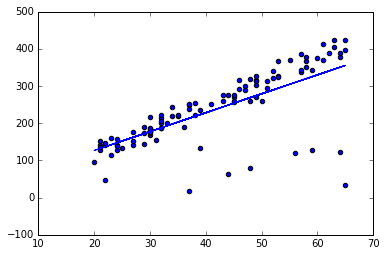

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points and n_columns is the number of features
ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, \
    net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.show()

In [13]:
print reg.coef_

[[ 5.07793064]]


In [14]:
print reg.score(ages_test, net_worths_test)

0.878262470366


# Slope After Cleaning

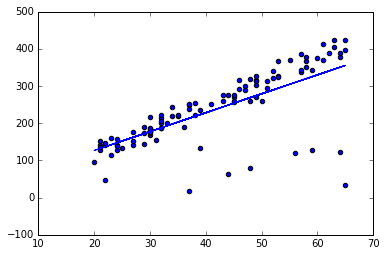

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

ages = pickle.load(open('practice_outliers_ages.pkl', 'r'))
net_worths = pickle.load(open('practice_outliers_net_worths.pkl', 'r'))

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points and n_columns is the number of features
ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, \
    net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.show()

In [30]:
def outlier_cleaner(predictions, ages, net_worths):
    errors = (net_worths - predictions) **2
    data = zip(ages, net_worths, errors)
    sorted_data = sorted(data, key=lambda x:x[2], reverse=True)
    limit = int(len(net_worths) * 0.1)
    return list(sorted_data[limit:])

cleaned_data = []
predictions = reg.predict(ages_train)
cleaned_data = outlier_cleaner( predictions, ages_train, net_worths_train )

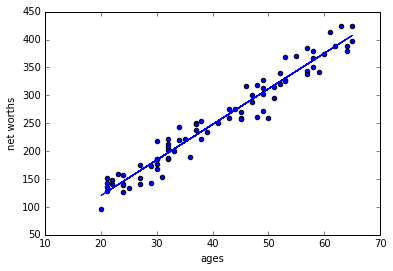

In [38]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [32]:
print reg.coef_

[[ 6.36859481]]


# Score After Cleaning

In [34]:
print reg.score(ages_test, net_worths_test)

0.983189455396


# Enron Outliers

In [35]:
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open('final_project_dataset.pkl', 'r'))
features = ['salary', 'bonus']
data = featureFormat(data_dict, features)

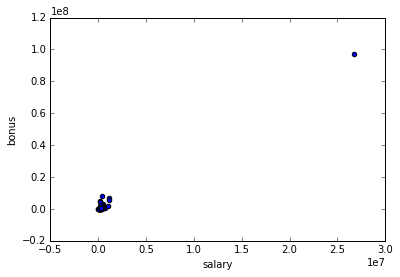

In [37]:
import matplotlib.pyplot

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# Identify the Biggest Enron Outlier

In [55]:
max_salary = 0
max_key = None

for key, value in data_dict.items():
    if value['salary'] != 'NaN':
        if value['salary'] > max_salary:
            max_salary = value['salary']
            max_key = key

print max_key, max_salary

TOTAL 26704229


# Any More Outliers?

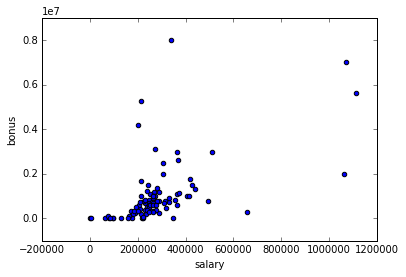

In [57]:
outlier = data_dict.pop('TOTAL', 0)
features = ['salary', 'bonus']
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# Identifying Two More Outliers

In [61]:
for key, value in data_dict.items():
    if value['salary'] != 'NaN':
        if value['bonus'] > 5000000 and value['salary'] > 1000000:
            print key

LAY KENNETH L
SKILLING JEFFREY K
